In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as gobj
from plotly.subplots import make_subplots
import argparse
from time import sleep

In [30]:
def _histogram_statistics():
    # TODO 
    ...

def _create_histogram(df: pd.DataFrame):
    sns.set(style="whitegrid")
    ax1 = sns.histplot(data=df['diff'], bins=100)
    ax2 = plt.twinx()
    ax2 = sns.histplot(data=df['diff'], bins=100, cumulative=True, element="poly", fill=False)
    return ax1, ax2

def _sum_rows(series: pd.Series) -> pd.Series:
    for i in range(1, len(series)):
        series.iloc[i] = series.iloc[i] + series.iloc[i-1]
    return series

def _is_valid_file(parser, arg):
        if not os.path.exists(arg):
            parser.error("The specified file does not exist.\n")
        else:
            return arg


In [43]:
def timeline_plotting(filepath: str):
    """
    Loads CSV files and saves them in a data array format for Timeline plots. 
    """
    df = pd.read_csv(filepath, skipinitialspace=True)

    # TODO: make the pod_state_filter as a parameter
    df = df[df['pod_state_filter'] == 'Stateless']

    created_df = df[df['Transition']=='{create schedule 0s}'].sort_values('from_unix')
    scheduled_df = df[df['Transition']=='{create schedule 0s}'].sort_values('to_unix')
    run_df = df[df['Transition']=='{schedule run 0s}'].sort_values('to_unix')
    watched_df = df[df['Transition']=='{run watch 0s}'].sort_values('to_unix') 

    minimal_val = created_df['from_unix'].iloc[0]

    created_df['from_unix'] = created_df['from_unix'] - minimal_val
    scheduled_df['to_unix'] = scheduled_df['to_unix'] - minimal_val
    run_df['to_unix'] = run_df['to_unix'] - minimal_val
    watched_df['to_unix'] = watched_df['to_unix'] - minimal_val 

    created_grouped = _sum_rows(created_df.groupby('from_unix').size())
    scheduled_grouped = _sum_rows(scheduled_df.groupby('to_unix').size())
    run_grouped = _sum_rows(run_df.groupby('to_unix').size())
    watched_grouped = _sum_rows(watched_df.groupby('to_unix').size())

    plt.plot(created_grouped.index, created_grouped.values)
    plt.plot(scheduled_grouped.index, scheduled_grouped.values)
    plt.plot(run_grouped.index, run_grouped.values)
    plt.plot(watched_grouped.index, watched_grouped.values)
    
    plt.show()


def histogram_plotting(filepath: str, num_bins: int):
    """
    Loads CSV files and saves them in a data array format for Timeline plots. 
    """
    df = pd.read_csv(filepath, skipinitialspace=True)

    # TODO: make the pod_state_filter as a parameter
    df = df[df['pod_state_filter'] == 'Stateless']

    created_df = df[df['Transition']=='{create schedule 0s}'].sort_values('diff')
    run_df = df[df['Transition']=='{schedule run 0s}'].sort_values('diff')
    watched_df = df[df['Transition']=='{run watch 0s}'].sort_values('diff') 

    fig = make_subplots(rows=3, cols=1)
    fig = gobj.Figure()
    fig.add_trace(gobj.Histogram(x=created_df['diff'], nbinsx=num_bins))
    fig.update_layout(
    autosize=False,
    width=1600,
    height=800)
    
    fig.show()
    
    fig = make_subplots(rows=3, cols=1)
    fig = gobj.Figure()
    fig.add_trace(gobj.Histogram(x=run_df['diff'], nbinsx=num_bins))
    fig.update_layout(
    autosize=False,
    width=1600,
    height=800)
    
    fig.show()
    
    fig = make_subplots(rows=3, cols=1)
    fig = gobj.Figure()
    fig.add_trace(gobj.Histogram(x=watched_df['diff'], nbinsx=num_bins))
    fig.update_layout(
    autosize=False,
    width=1500,
    height=800)
    
    fig.show()


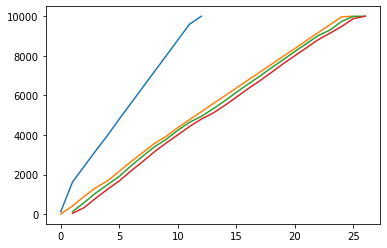

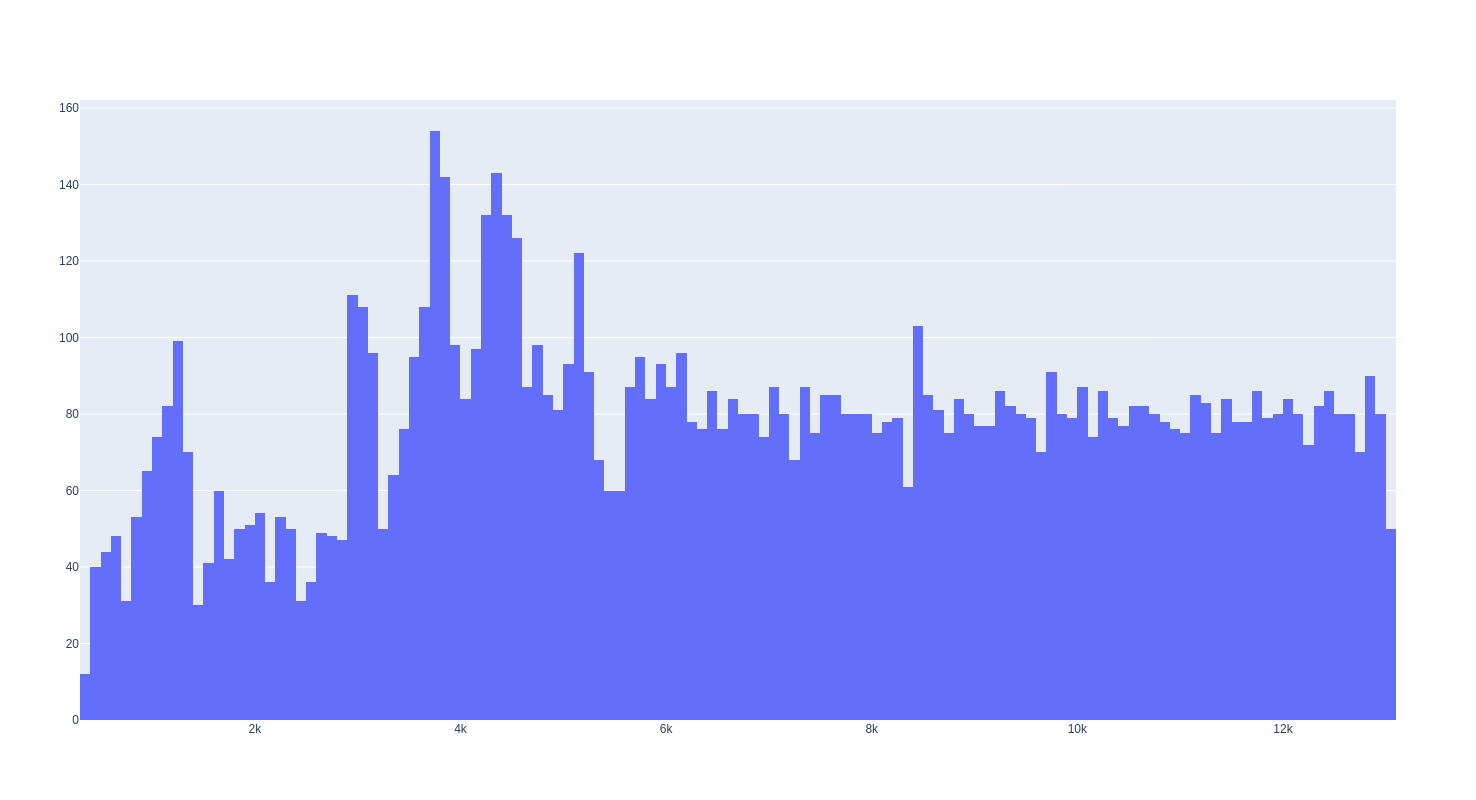

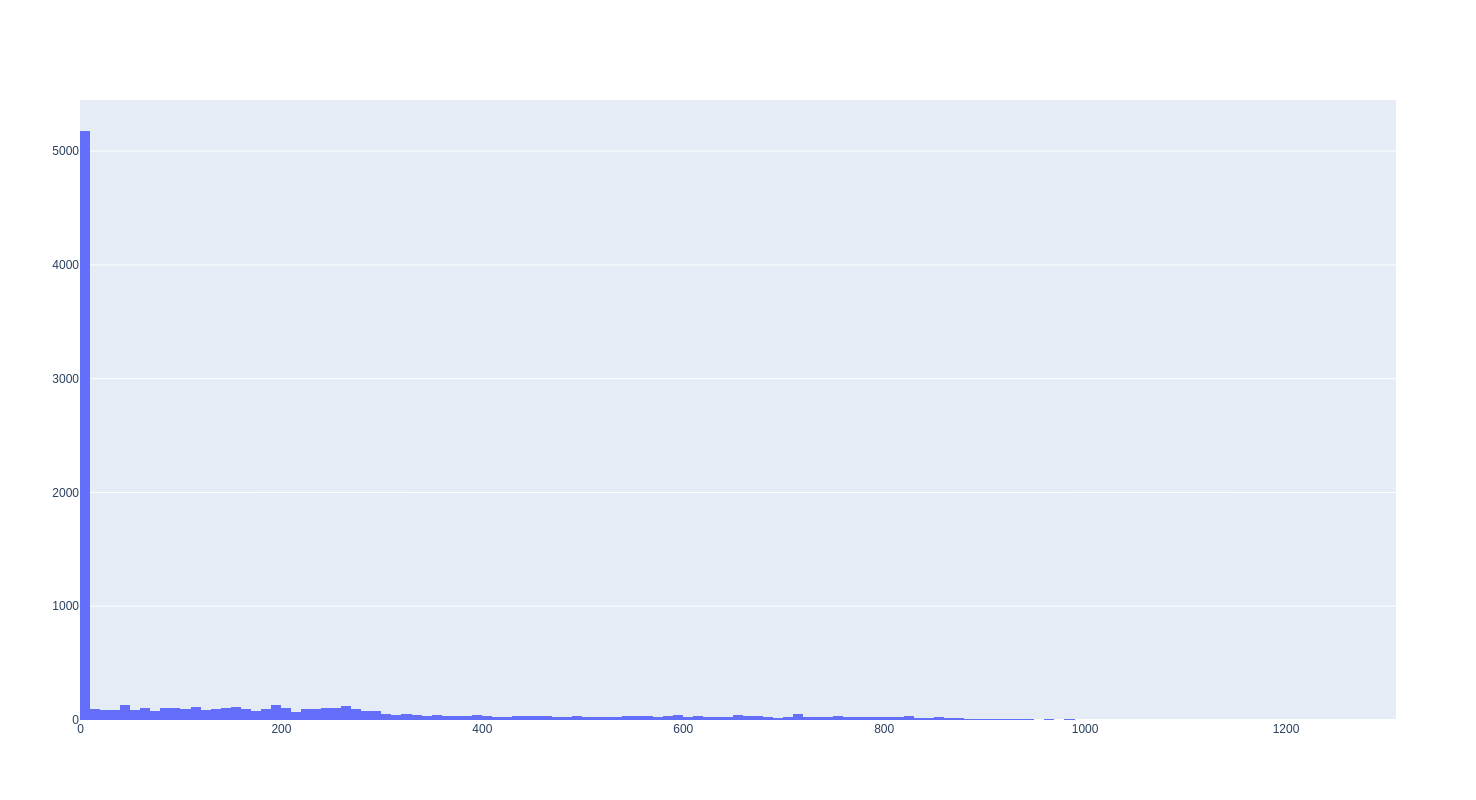

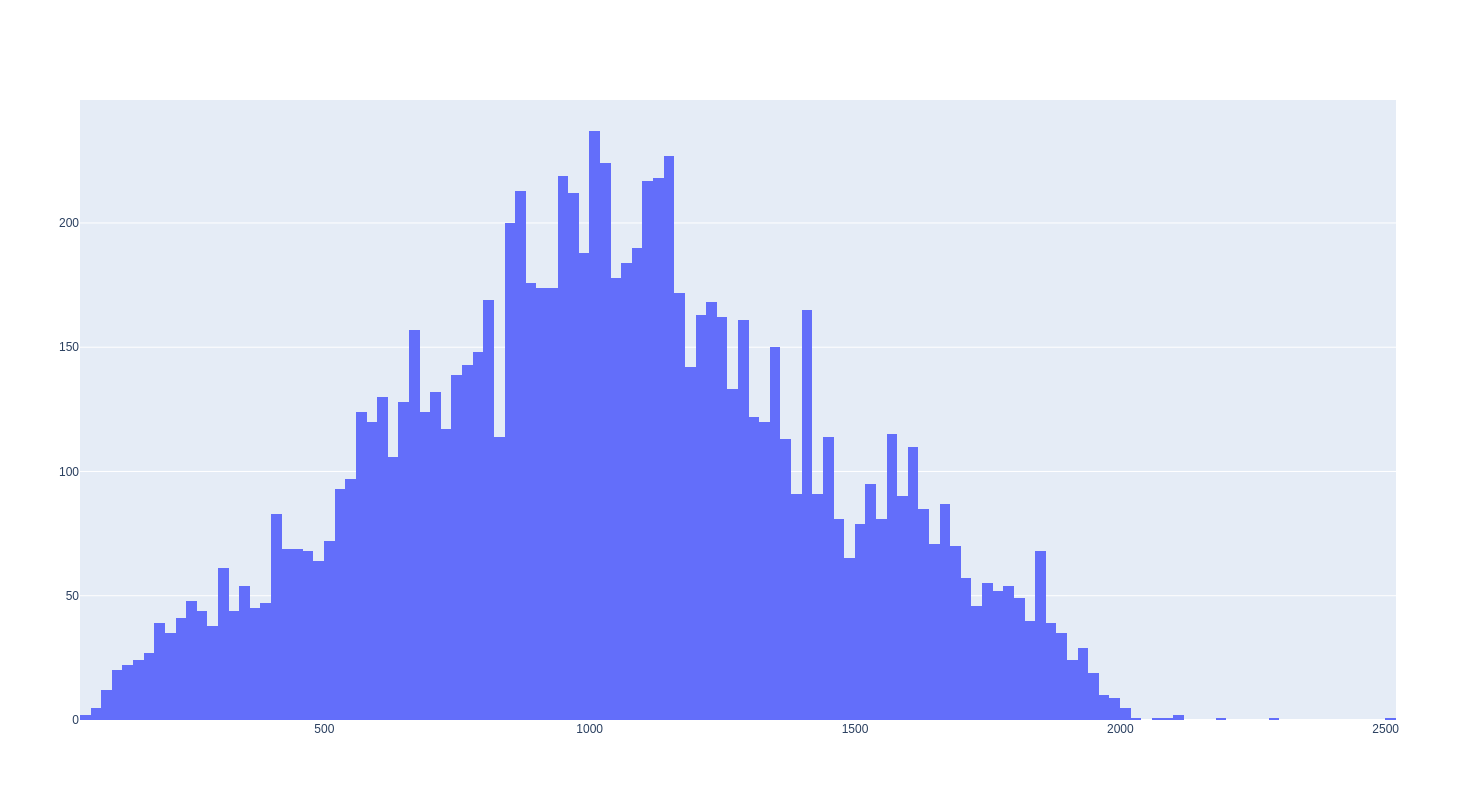

In [45]:
timeline_plotting("../timeline-2000nodes.csv")
histogram_plotting("../timeline-2000nodes.csv", num_bins=200)
